In [131]:
import os
import torch
from models import Generator, UNet
import utils
from dataset import SpaceNet_testsetter
from torch.utils.data import DataLoader
import config
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = Generator(in_channels=4).to(DEVICE)
utils.load_model("Saved Models\gen.pth.tar", model)

segmentation= UNet().to(config.DEVICE)
utils.load_model("Saved Models\seg_model_for_presentation.pth",segmentation)

=> Loading model
=> Loading model


In [132]:
test_dataset= SpaceNet_testsetter()
test_loader= DataLoader(test_dataset, config.BATCH_SIZE, shuffle=False)

In [133]:
save_path = "pytorch-fid/cgan_dataset"

In [134]:
loop = tqdm(test_loader, leave=True)
model.eval()
k = 0
with torch.no_grad():
    for idx, data in enumerate(loop):
        input_img, y ,loc, img_number, is_final = data
        input_img, y ,loc, img_number, is_final=input_img.to(config.DEVICE), y.to(config.DEVICE) ,loc.to(config.DEVICE), img_number.to(config.DEVICE), is_final.to(config.DEVICE)
        y_mask = segmentation(y) # check image sizes after segmentation 512 size.   
        day0_seg_mask=segmentation(input_img)
        x = torch.cat((input_img,y_mask),dim=1) #size ---> (64,4,512,512)
        
        fake_image = model(x)
        for i in range(fake_image.size(0)):
            # if k < 50:
            img = fake_image[i].cpu().permute(1,2,0).detach().numpy()
            img = (img*255.0).astype(np.uint8)
            img = Image.fromarray(img, mode="RGB").resize((299, 299))
            img.save(os.path.join(save_path, f"img_{k}.png"))
            # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            # img = cv2.resize(img, (299, 299))
            # cv2.imwrite(os.path.join(save_path, f"img_{k}.jpg"), img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
            # plt.imsave(os.path.join(save_path, f"img_{k}.jpg"), img)
            k += 1
# print(k)

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


In [135]:
fake_image.shape

torch.Size([2, 3, 512, 512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
float32


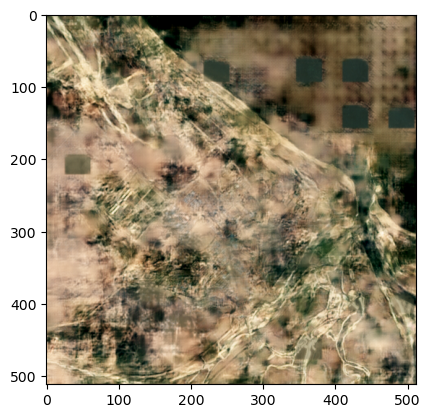

In [136]:
fake_image = fake_image[0].detach().cpu().permute(1, 2, 0).numpy()
print(fake_image.shape)
print(fake_image.dtype)
plt.imshow(fake_image)